# Line Chart with Matplotlin

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Setting seaborn as default style even if use only matplotlib
sns.set()

## Example 1: Simple Line Chart

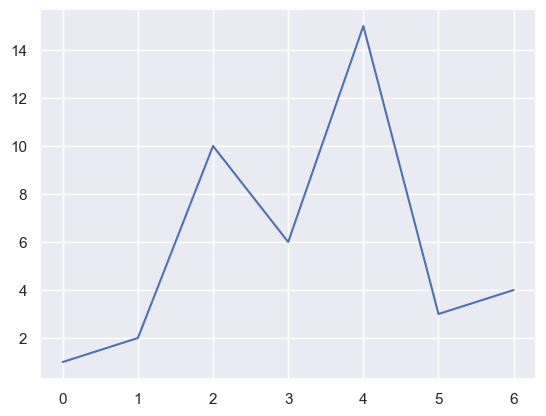

In [15]:
plt.plot([1,2,10,6,15,3,4])
plt.show()

## Example 2: Using Pandas DataFrames

### Datasets for Visualizations

In [19]:
# url 1
grouped_country_df_url = "https://raw.githubusercontent.com/nyangweso-rodgers/Data_Analytics/main/Analytics-with-Python/Exploratory-Data-Analysis-with-Python/Exploratory-Data-Analysis-for-Online-Retail-Store/grouped_country_data.csv"
grouped_country_df = pd.read_csv(grouped_country_df_url)

# url 2
grouped_daily_country_df_url = "https://raw.githubusercontent.com/nyangweso-rodgers/Data_Analytics/main/Analytics-with-Python/Exploratory-Data-Analysis-with-Python/Exploratory-Data-Analysis-for-Online-Retail-Store/grouped_daily_country_df.csv"
grouped_daily_country_df = pd.read_csv(grouped_daily_country_df_url)

In [20]:
# preview the data
grouped_country_df.head()

,Country,CountOfUniqueCustomers,TotalAmount,CountOfUniqueInvoices,AverageSalesValue
0,Australia,9,138521.31,57,15391.256667
1,Austria,11,10198.68,17,927.152727
2,Bahrain,2,548.40,2,274.200000
3,Belgium,25,41196.34,98,1647.853600
4,Brazil,1,1143.60,1,1143.600000


In [21]:
grouped_daily_country_df.head()

,Date,Country,MonthYear,TotalAmount,CountOfUniqueInvoices,CountOfUniqueCustomers
0,2010-12-01,Australia,2010-12,358.25,1,1
1,2010-12-01,EIRE,2010-12,555.38,2,1
2,2010-12-01,France,2010-12,855.86,1,1
3,2010-12-01,Germany,2010-12,261.48,1,1
4,2010-12-01,Netherlands,2010-12,192.60,1,1


#### Data Aggregations for Visualizations

In [54]:
# get month on month total sales value
monthly_agg_df = grouped_daily_country_df.groupby('MonthYear').agg(
    TotalAmount = pd.NamedAgg(column='TotalAmount', aggfunc='sum')
).reset_index()

# get month on month total sales value by Country
country_monthly_agg_df = grouped_daily_country_df.groupby(['MonthYear', 'Country']).agg(
    TotalAmount = pd.NamedAgg(column='TotalAmount', aggfunc='sum')
)

#### Filter the DataFame for Visualization

In [17]:
# Filter Only Countries with More than 5 Customers
filtered_df = grouped_country_df[grouped_country_df['CountOfUniqueCustomers'] >= 10]
filtered_df.shape

(11, 5)

In [18]:
df = filtered_df[['Country', 'TotalAmount', 'CountOfUniqueCustomers', 'AverageSalesValue', 'CountOfUniqueInvoices']]#.set_index('Country')

### Monthly Visualizations
1. Monthly Sales Value

In [28]:
monthly_agg_df = grouped_daily_country_df.groupby('MonthYear').agg(
    TotalAmount = pd.NamedAgg(column='TotalAmount', aggfunc='sum')
).reset_index()

monthly_agg_df.head()

,MonthYear,TotalAmount
0,2010-12,572713.890
1,2011-01,569445.040
2,2011-02,447137.350
3,2011-03,595500.760
4,2011-04,469200.361


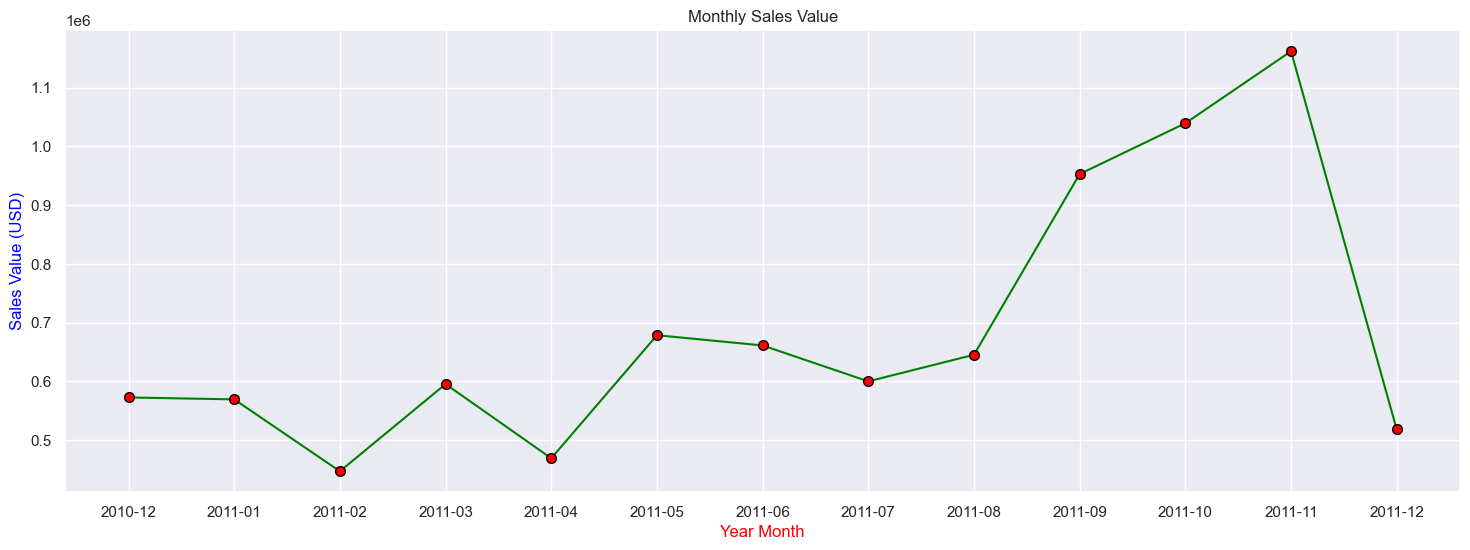

In [59]:
fig, axes = plt.subplots(1,1, figsize=(18,6), sharey=True)
plt.plot(monthly_agg_df.MonthYear, monthly_agg_df.TotalAmount, color='green', marker='o', linestyle='solid', markeredgecolor='black', markersize=7, markerfacecolor='red')
plt.title("Monthly Sales Value")
plt.ylabel("Sales Value (USD)", color='blue')
plt.xlabel("Year Month", color='red')
plt.show()

### Using Seaborn

TypeError: plot() got an unexpected keyword argument 'x'

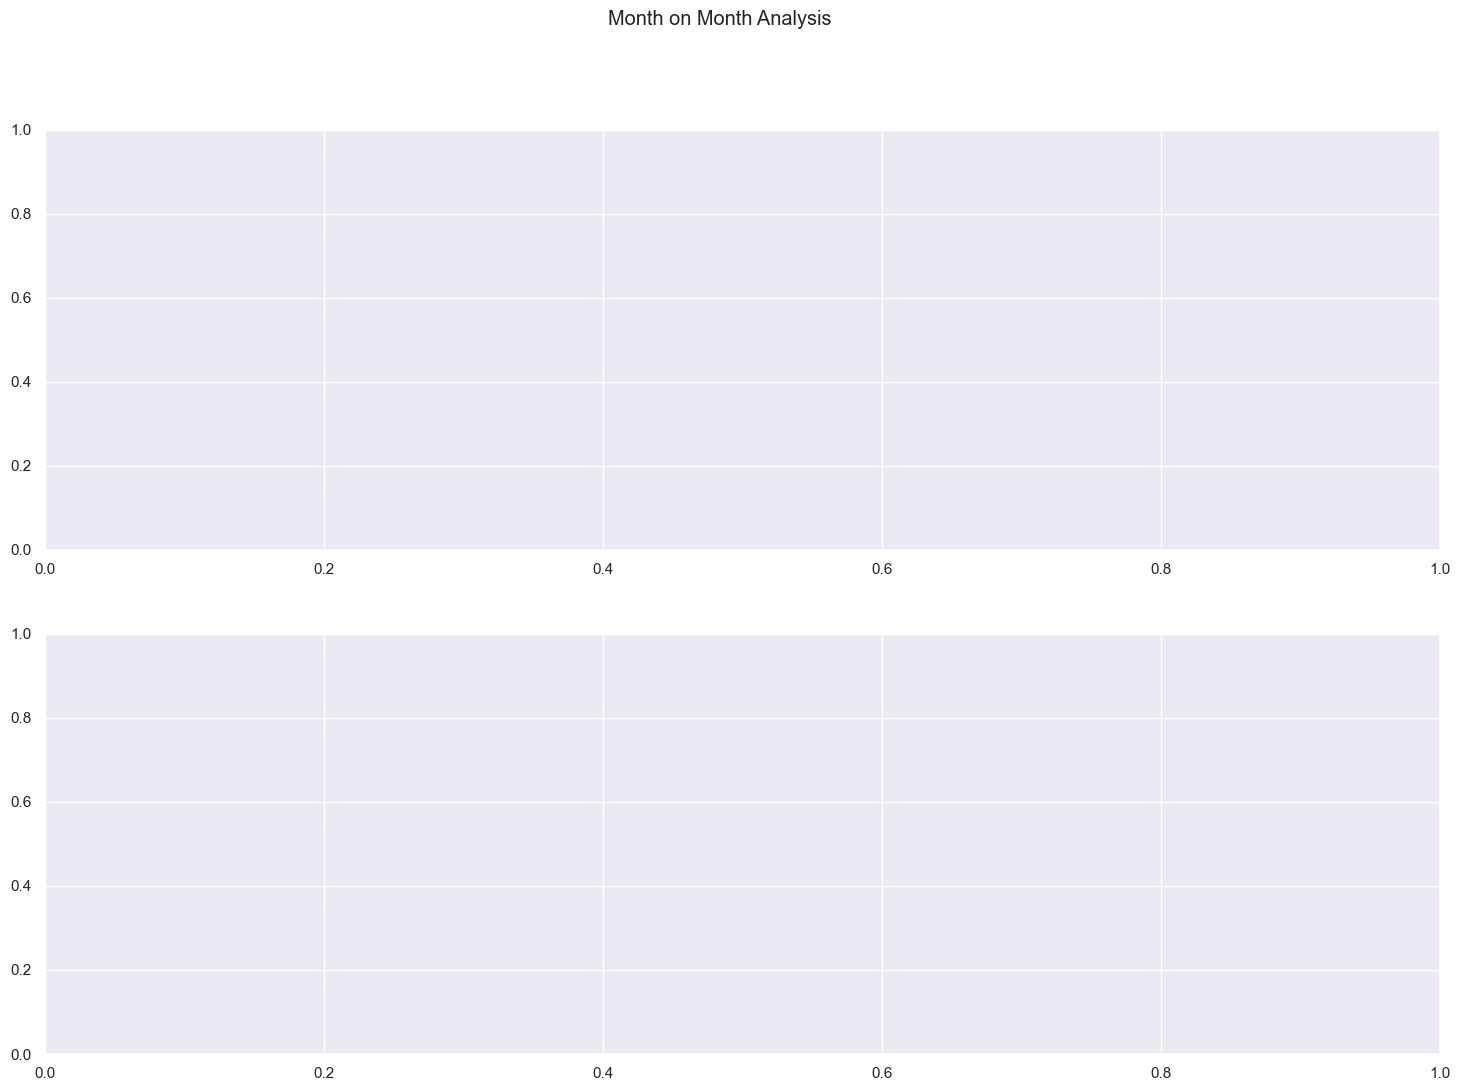

In [46]:
fig, axes = plt.subplots(2,1, figsize=(18,12), sharey=True)
fig.suptitle('Month on Month Analysis')

plt.plot(ax=axes[1], x=monthly_agg_df.MonthYear, y=monthly_agg_df.TotalAmount, color='green', marker='o', linestyle='solid')
#sns.barplot(ax=axes[0], x=df.Country, y=df.AverageSalesValue)
#axes[0].set_title("Average Sales Value By Country")
plt.stackplot(ax=axes[2], x=monthly_agg_df.MonthYear, y=monthly_agg_df.TotalAmount, color='green')

In [ ]:
fig, axes = plt.subplots(2,1, figsize=(18,12), sharey=True)
fig.suptitle('Month on Month Analysis')

plt.plot(ax=axes[1], x=monthly_agg_df.MonthYear, y=monthly_agg_df.TotalAmount, color='green', marker='o', linestyle='solid')
#sns.barplot(ax=axes[0], x=df.Country, y=df.AverageSalesValue)
#axes[0].set_title("Average Sales Value By Country")
plt.stackplot(ax=axes[2], x=monthly_agg_df.MonthYear, y=monthly_agg_df.TotalAmount, color='green')